In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [2]:
df=pd.read_csv(r"C:\Users\sachin\visa\visa-status-prediction-1 - Copy\datasets\Feature_engineered_data.csv")

In [3]:
df.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,full_time_position,case_status,annual_wage,application_year,application_month,has_previous_rejection,...,region_of_employment_South,region_of_employment_West,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master,visa_E-2,visa_H-1B,visa_L-1,visa_O-1,visa_TN
0,0,0,14513,2007,1,0,1231782.032,2023,1,0,...,0,1,0,1,0,False,False,True,False,False
1,1,0,2412,2002,1,1,83425.650,2023,12,0,...,0,0,0,0,1,False,False,False,False,True
2,0,1,44444,2008,1,0,122996.860,2022,5,0,...,0,1,0,0,0,False,False,False,False,True
3,0,0,98,1897,1,0,83434.030,2023,7,0,...,0,1,0,0,0,False,False,False,True,False
4,1,0,1082,2005,1,1,149907.390,2023,2,0,...,1,0,0,0,1,False,False,True,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   no_of_employees                    25480 non-null  int64  
 3   yr_of_estab                        25480 non-null  int64  
 4   full_time_position                 25480 non-null  int64  
 5   case_status                        25480 non-null  int64  
 6   annual_wage                        25480 non-null  float64
 7   application_year                   25480 non-null  int64  
 8   application_month                  25480 non-null  int64  
 9   has_previous_rejection             25480 non-null  int64  
 10  processing_time_days               25480 non-null  int64  
 11  company_age                        25480 non-null  int

Selecting The Features To Train Model

In [6]:
required_columns = [
    'education_of_employee_High School', 'education_of_employee_Master', 'education_of_employee_Doctorate', 'has_job_experience', 'requires_job_training', 
    'no_of_employees', 'full_time_position', 'company_age', 
    'annual_wage', 'continent_Asia', 'continent_Europe', 
    'continent_North America', 'continent_Oceania', 'continent_South America',
    'region_of_employment_South', 'region_of_employment_West', 
]


X = df[required_columns].copy()

Y = df['case_status']


print("Independent Variables (Selected Features)\n", "=" * 80, "\n", X.sample(5, random_state=1))
print("\n\nDependent Variable (Target)\n", "=" * 80, "\n", Y.sample(5, random_state=1))

Independent Variables (Selected Features)
        education_of_employee_High School  education_of_employee_Master  \
17639                                  0                             0   
23951                                  0                             0   
8625                                   0                             1   
20206                                  0                             0   
7471                                   0                             0   

       education_of_employee_Doctorate  has_job_experience  \
17639                                0                   1   
23951                                0                   0   
8625                                 0                   0   
20206                                0                   1   
7471                                 0                   1   

       requires_job_training  no_of_employees  full_time_position  \
17639                      0              567                   1   
2

Train Test Data Split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)

# Check number of rows in each data set
print("Number of rows in training data set =", X_train.shape[0])
print("\nNumber of rows in test data set =", X_test.shape[0])

# Show percentage of number of rows in each data set
print("\nPercentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Number of rows in training data set = 17836

Number of rows in test data set = 7644

Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64

Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


Function For Performace Metrics

In [ ]:
def get_metrics_score(model, flag=True):
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = accuracy_score(Y_train, pred_train)  
    test_acc = accuracy_score(Y_test, pred_test)

    train_recall = recall_score(Y_train, pred_train)  
    test_recall = recall_score(Y_test, pred_test)

    train_precision = precision_score(Y_train, pred_train)  
    test_precision = precision_score(Y_test, pred_test)

    train_f1 = f1_score(Y_train, pred_train)  
    test_f1 = f1_score(Y_test, pred_test)

    
    df_perf = pd.DataFrame(
        {
            "Accuracy": [train_acc, test_acc],
            "Recall": [train_recall, test_recall],
            "Precision": [train_precision, test_precision],
            "F1": [train_f1, test_f1],
        },
        index=["Training", "Test"],
    )

    return df_perf


Function For Confusion Matrix

In [10]:

def make_confusion_matrix(model):
    
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.title("Test Set's Confusion Matrix", fontsize=16)
    plt.ylabel("Actual Label", fontsize=15)
    plt.xlabel("Predicted Label", fontsize=15)

Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
dcsn_tree = DecisionTreeClassifier(criterion="gini", random_state=1)
dcsn_tree.fit(X_train, Y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",1
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

,Accuracy,Recall,Precision,F1
Training,1.000000,1.000000,1.000000,1.000000
Test,0.645997,0.726738,0.738897,0.732767


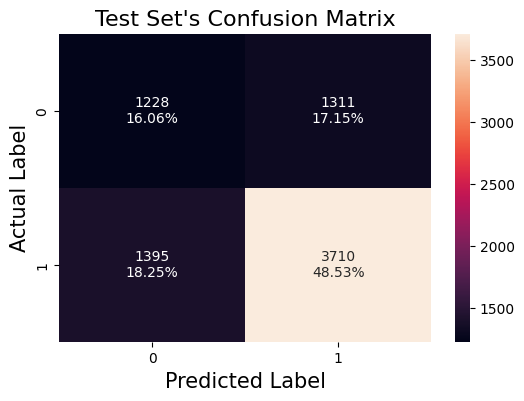

In [12]:
make_confusion_matrix(dcsn_tree)

perf_dcsn_tree = get_metrics_score(dcsn_tree)
perf_dcsn_tree

Tuned Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score


tnd_dcsn_tree = DecisionTreeClassifier(random_state=1)

grid_para = {
    "class_weight": ["balanced", None],
    "max_depth": np.arange(2, 21, 2),
    "max_leaf_nodes": np.arange(2, 21, 2),
    "min_samples_split": [100, 200, 400, 800],
    "min_impurity_decrease": [0.0001, 0.001, 0.01],
}

scorer = make_scorer(f1_score)


grid_obj = GridSearchCV(tnd_dcsn_tree, grid_para, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)


tnd_dcsn_tree = grid_obj.best_estimator_

tnd_dcsn_tree.fit(X_train, Y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",100
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",1
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",14
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current nod

,Accuracy,Recall,Precision,F1
Training,0.728302,0.926551,0.735425,0.819999
Test,0.721350,0.927326,0.729093,0.816348


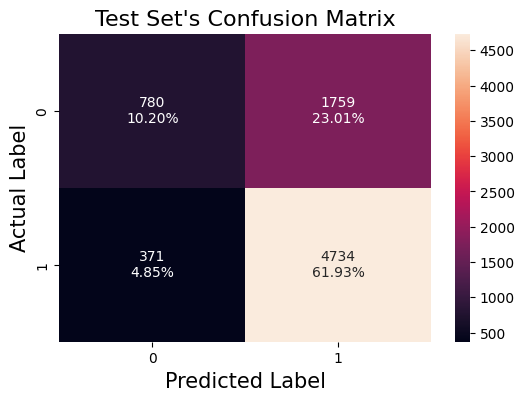

In [14]:
make_confusion_matrix(tnd_dcsn_tree)

perf_tnd_dcsn_tree = get_metrics_score(tnd_dcsn_tree)
perf_tnd_dcsn_tree

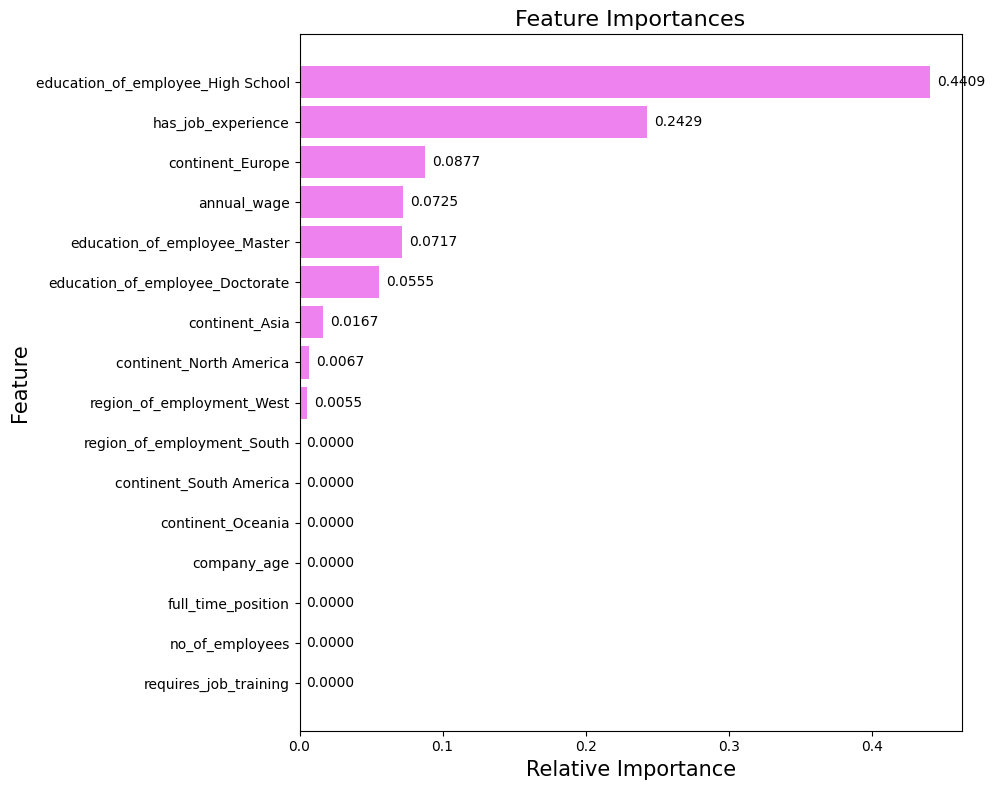

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

col_names = list(X.columns)
importances = tnd_dcsn_tree.feature_importances_
indices = np.argsort(importances)

# 2. Create the plot
# Using subplots is better for accessing the 'ax' object required for annotations
fig, ax = plt.subplots(figsize=(10, 0.5 * len(col_names)))

# 3. Create the horizontal bars
bars = ax.barh(range(len(indices)), importances[indices], color="violet", align="center")

# 4. Set labels and ticks
ax.set_yticks(range(len(indices)))
ax.set_yticklabels([col_names[i] for i in indices])
ax.set_xlabel("Relative Importance", fontsize=15)
ax.set_ylabel("Feature", fontsize=15)
ax.set_title("Feature Importances", fontsize=16)

ax.bar_label(bars, fmt='%.4f', padding=5, fontsize=10)

plt.tight_layout()
plt.show()

Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rndm_frst = RandomForestClassifier(random_state=1)
rndm_frst.fit(X_train, Y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

,Accuracy,Recall,Precision,F1
Training,1.000000,1.000000,1.000000,1.000000
Test,0.715463,0.838198,0.760306,0.797354


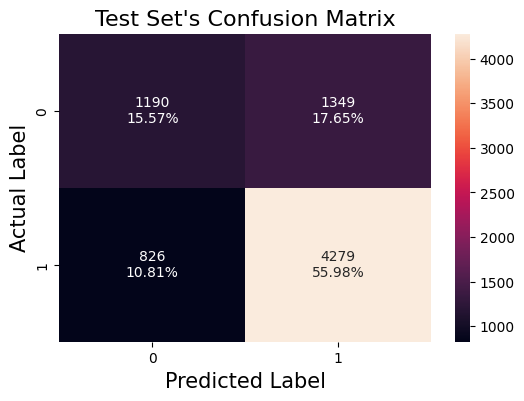

In [19]:
make_confusion_matrix(rndm_frst)

perf_rndm_frst = get_metrics_score(rndm_frst)
perf_rndm_frst

Tuned Random Forest

In [20]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

tnd_rndm_frst = RandomForestClassifier(oob_score=True, random_state=1)

grid_para = {
    "class_weight": ["balanced", None],
    "max_samples": [0.7, 0.8, 0.9, 1.0],
    "max_depth": [None, 5, 10, 15], # Increased depth for better performance
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 10, 20, 50], # Lowered for better learning
    "n_estimators": [50, 100, 150],
}

scorer = make_scorer(f1_score)


rand_obj = RandomizedSearchCV(
    estimator=tnd_rndm_frst, 
    param_distributions=grid_para, 
    n_iter=30, 
    scoring=scorer, 
    cv=3,            
    random_state=1,
    n_jobs=1         
)


print("Starting training...")
rand_obj = rand_obj.fit(X_train, Y_train)

best_rf_model = rand_obj.best_estimator_

print("✅ Training complete!")
print(f"Best Parameters: {rand_obj.best_params_}")

Starting training...
✅ Training complete!
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_samples': 0.7, 'max_features': 'log2', 'max_depth': 10, 'class_weight': None}


In [21]:
best_rf_model.fit(X_train, Y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'log2'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

,Accuracy,Recall,Precision,F1
Training,0.768222,0.905649,0.781868,0.839219
Test,0.736264,0.886582,0.759014,0.817853


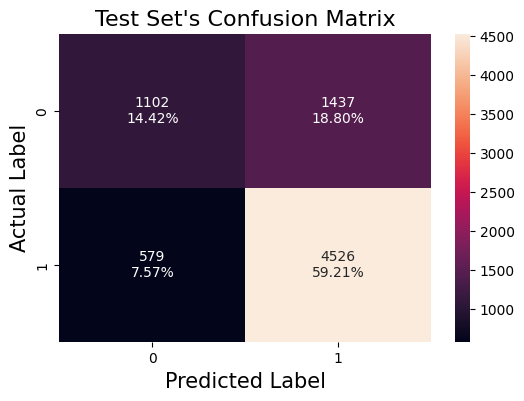

In [22]:
make_confusion_matrix(best_rf_model)

perf_tnd_rndm_frst = get_metrics_score(best_rf_model)
perf_tnd_rndm_frst

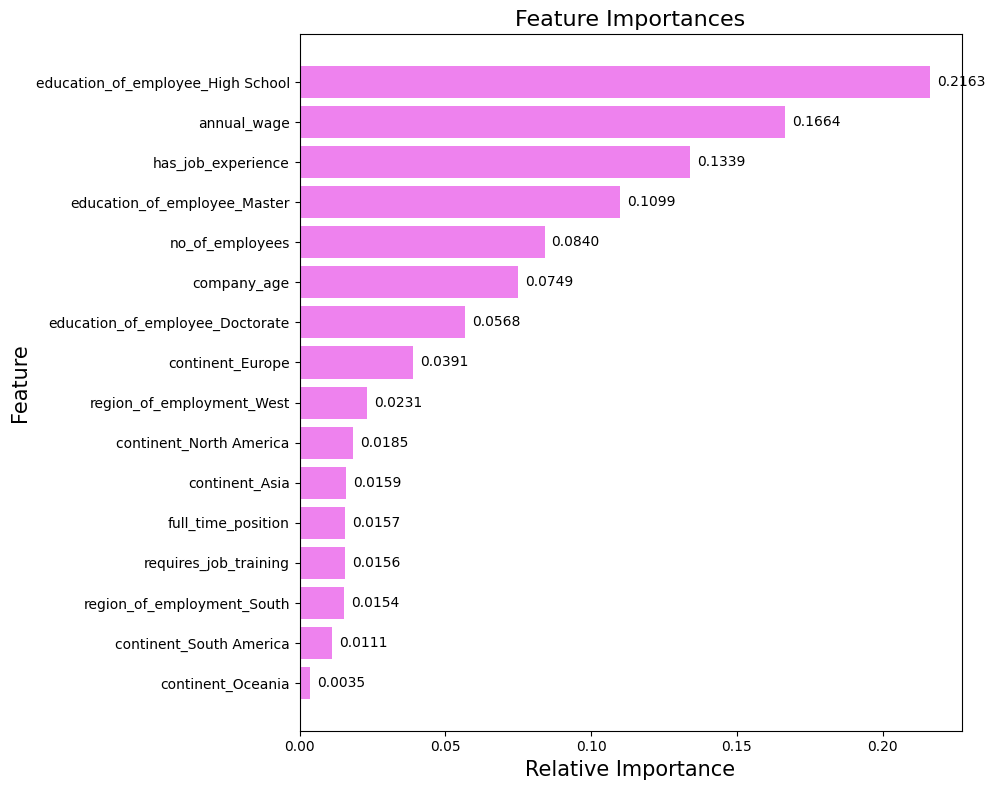

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

col_names = list(X.columns)
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 0.5 * len(col_names)))

bars = ax.barh(range(len(indices)), importances[indices], color="violet", align="center")

ax.set_yticks(range(len(indices)))
ax.set_yticklabels([col_names[i] for i in indices])
ax.set_xlabel("Relative Importance", fontsize=15)
ax.set_ylabel("Feature", fontsize=15)
ax.set_title("Feature Importances", fontsize=16)

ax.bar_label(bars, fmt='%.4f', padding=5, fontsize=10)

plt.tight_layout()
plt.show()

Ada Boost Classifier

In [24]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(random_state=1)
ada_boost.fit(X_train, Y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",50
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",1


,Accuracy,Recall,Precision,F1
Training,0.730209,0.896248,0.749105,0.816097
Test,0.720958,0.891675,0.742335,0.810181


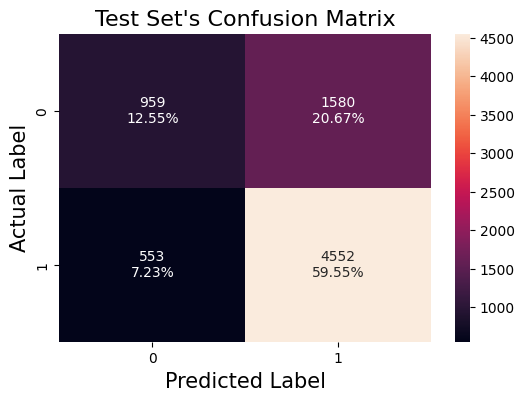

In [25]:
make_confusion_matrix(ada_boost)

perf_ada_boost = get_metrics_score(ada_boost)
perf_ada_boost

AdaBoost Classifier with Hyperparameter Tuning

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


tnd_ada_boost = AdaBoostClassifier(random_state=1)

grid_para = {
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": [20, 40, 60, 80, 100],
    "learning_rate": [0.2, 0.4, 0.6, 0.8, 1.0],
}

rand_obj_ada = RandomizedSearchCV(
    tnd_ada_boost, 
    grid_para, 
    n_iter=15, 
    scoring=scorer, 
    cv=3, 
    random_state=1,
    n_jobs=1
)


rand_obj_ada.fit(X_train, Y_train)

tnd_ada_boost = rand_obj_ada.best_estimator_

tnd_ada_boost.fit(X_train, Y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",DecisionTreeC...andom_state=1)
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",80
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",0.2
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",1
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None


,Accuracy,Recall,Precision,F1
Training,0.740917,0.889029,0.762491,0.820912
Test,0.733255,0.887757,0.755585,0.816356


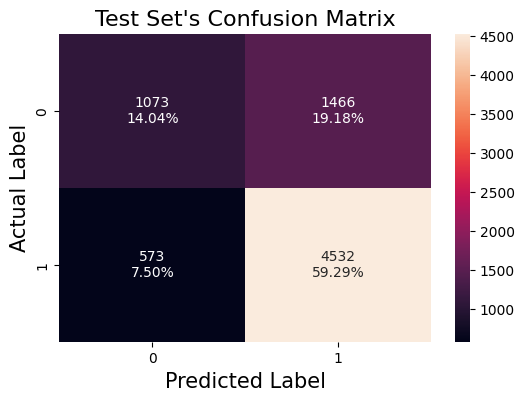

In [27]:
make_confusion_matrix(tnd_ada_boost)

perf_tnd_ada_boost = get_metrics_score(tnd_ada_boost)
perf_tnd_ada_boost

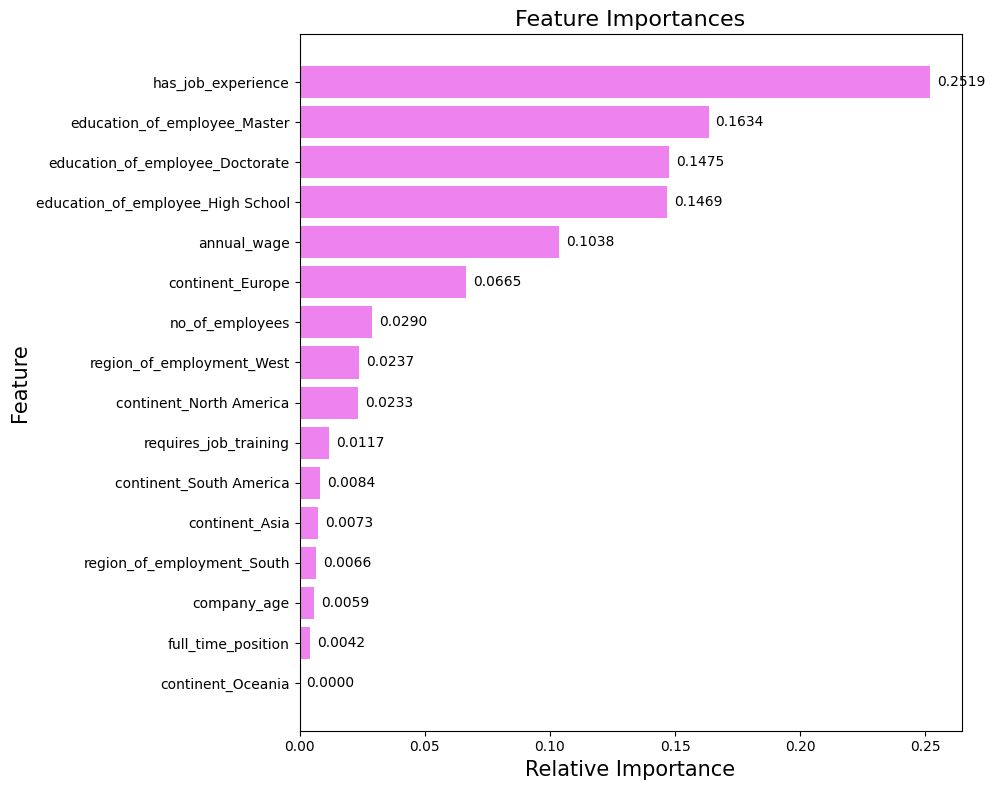

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

col_names = list(X.columns)
importances = tnd_ada_boost.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 0.5 * len(col_names)))

bars = ax.barh(range(len(indices)), importances[indices], color="violet", align="center")

ax.set_yticks(range(len(indices)))
ax.set_yticklabels([col_names[i] for i in indices])
ax.set_xlabel("Relative Importance", fontsize=15)
ax.set_ylabel("Feature", fontsize=15)
ax.set_title("Feature Importances", fontsize=16)

ax.bar_label(bars, fmt='%.4f', padding=5, fontsize=10)

plt.tight_layout()
plt.show()

Gradient Boosting Classifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
grdnt_boost = GradientBoostingClassifier(random_state=1)
grdnt_boost.fit(X_train, Y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

,Accuracy,Recall,Precision,F1
Training,0.749888,0.885671,0.772967,0.825490
Test,0.734956,0.878550,0.761331,0.815751


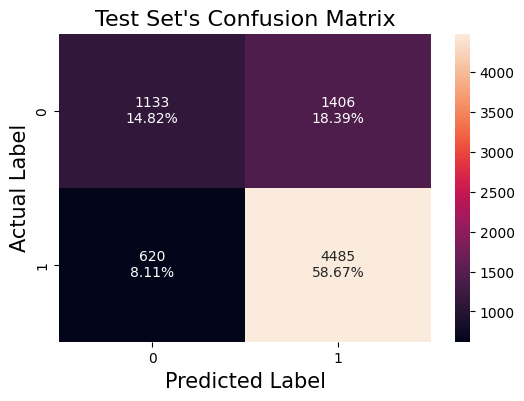

In [30]:
make_confusion_matrix(grdnt_boost)


perf_grdnt_boost = get_metrics_score(grdnt_boost)
perf_grdnt_boost

Gradient Boosting Classifier with Hyperparameter Tuning

In [ ]:
grid_para = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

tnd_grdnt_boost = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), 
    random_state=1
)

rand_obj_gb = RandomizedSearchCV(
    estimator=tnd_grdnt_boost, 
    param_distributions=grid_para, 
    n_iter=20,          
    scoring=scorer, 
    cv=3,               
    random_state=1,
    n_jobs=1            
)

print("Starting Gradient Boosting training...")
rand_obj_gb.fit(X_train, Y_train)

best_gb_model = rand_obj_gb.best_estimator_

print(f"✅ Complete! Best Parameters: {rand_obj_gb.best_params_}")

Starting Gradient Boosting training...
✅ Complete! Best Parameters: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


In [36]:
best_gb_model.fit(X_train, Y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",50
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, `

,Accuracy,Recall,Precision,F1
Training,0.742655,0.892303,0.762718,0.822437
Test,0.733255,0.890108,0.754567,0.816752


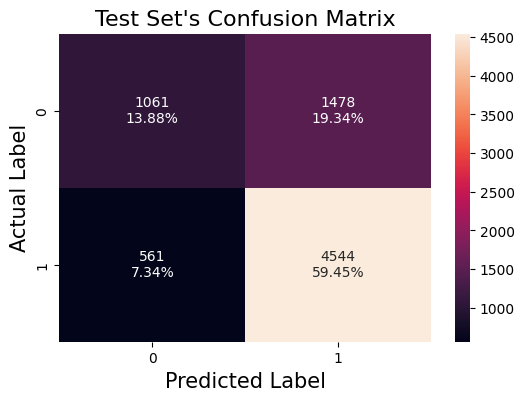

In [37]:
make_confusion_matrix(best_gb_model)

perf_tnd_grdnt_boost = get_metrics_score(best_gb_model)
perf_tnd_grdnt_boost

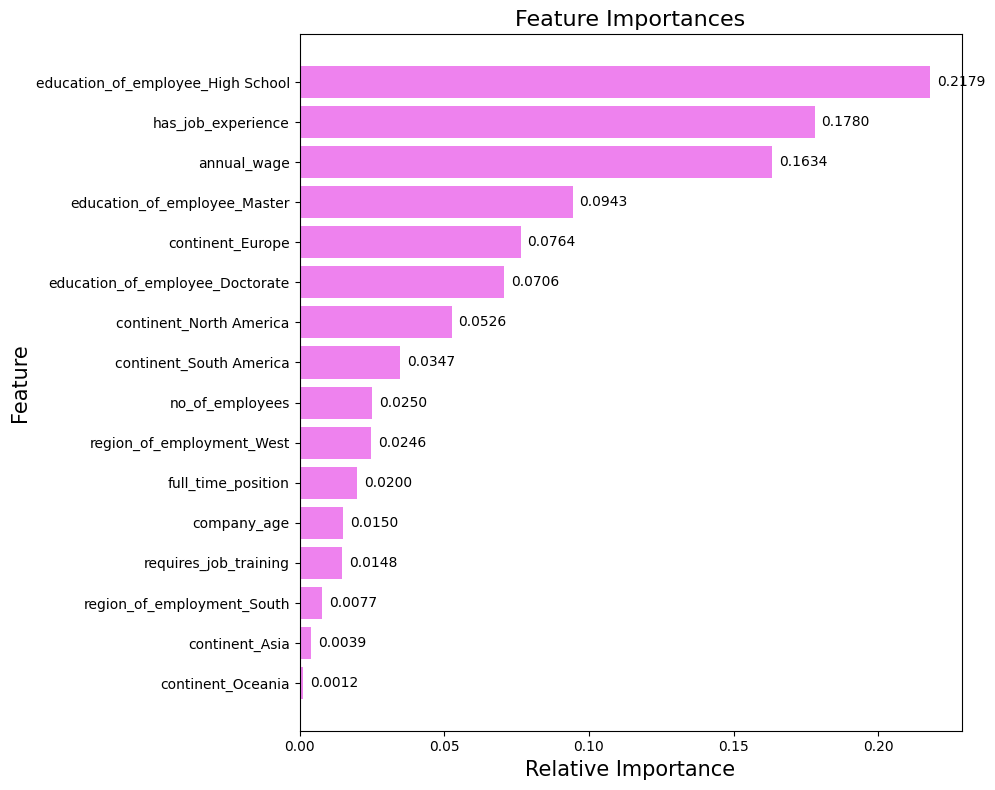

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Get column names and importances (assuming tnd_dcsn_tree and X exist)
col_names = list(X.columns)
importances = best_gb_model.feature_importances_
indices = np.argsort(importances)

# 2. Create the plot
# Using subplots is better for accessing the 'ax' object required for annotations
fig, ax = plt.subplots(figsize=(10, 0.5 * len(col_names)))

# 3. Create the horizontal bars
bars = ax.barh(range(len(indices)), importances[indices], color="violet", align="center")

# 4. Set labels and ticks
ax.set_yticks(range(len(indices)))
ax.set_yticklabels([col_names[i] for i in indices])
ax.set_xlabel("Relative Importance", fontsize=15)
ax.set_ylabel("Feature", fontsize=15)
ax.set_title("Feature Importances", fontsize=16)

# 5. Add Annotations (The labels at the end of the bars)
# fmt='%.4f' formats the number to 4 decimal places
# padding=3 moves the text slightly to the right of the bar
ax.bar_label(bars, fmt='%.4f', padding=5, fontsize=10)

# 6. Adjust layout to ensure no labels are cut off
plt.tight_layout()
plt.show()

In [39]:
perf_train = pd.concat(
    [
        perf_dcsn_tree.loc["Training"].T,
        perf_tnd_dcsn_tree.loc["Training"].T,
        perf_rndm_frst.loc["Training"].T,
        perf_tnd_rndm_frst.loc["Training"].T,
        perf_ada_boost.loc["Training"].T,
        perf_tnd_ada_boost.loc["Training"].T,
        perf_grdnt_boost.loc["Training"].T,
        perf_tnd_grdnt_boost.loc["Training"].T,
    ],
    axis=1,
)

perf_train.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "AdaBoost",
    "Tuned AdaBoost",
    "Gradient Boosting",
    "Tuned Gradient Boosting",
]

print("Model Performance Comparison for Training Data Set:")
perf_train

Model Performance Comparison for Training Data Set:


,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,AdaBoost,Tuned AdaBoost,Gradient Boosting,Tuned Gradient Boosting
Accuracy,1.0,0.728302,1.0,0.768222,0.730209,0.740917,0.749888,0.742655
Recall,1.0,0.926551,1.0,0.905649,0.896248,0.889029,0.885671,0.892303
Precision,1.0,0.735425,1.0,0.781868,0.749105,0.762491,0.772967,0.762718
F1,1.0,0.819999,1.0,0.839219,0.816097,0.820912,0.825490,0.822437


In [ ]:
perf_test = pd.concat(
    [
        perf_dcsn_tree.loc["Test"].T,
        perf_tnd_dcsn_tree.loc["Test"].T,
        perf_rndm_frst.loc["Test"].T,
        perf_tnd_rndm_frst.loc["Test"].T,
        perf_ada_boost.loc["Test"].T,
        perf_tnd_ada_boost.loc["Test"].T,
        perf_grdnt_boost.loc["Test"].T,
        perf_tnd_grdnt_boost.loc["Test"].T,
    ],
    axis=1,
)

perf_test.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "AdaBoost",
    "Tuned AdaBoost",
    "Gradient Boosting",
    "Tuned Gradient Boosting",
]

print("Model Performance Comparison for Test Data Set:")
perf_test

Model Performance Comparison for Test Data Set:


,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,AdaBoost,Tuned AdaBoost,Gradient Boosting,Tuned Gradient Boosting
Accuracy,0.645997,0.721350,0.715463,0.736264,0.720958,0.733255,0.734956,0.733255
Recall,0.726738,0.927326,0.838198,0.886582,0.891675,0.887757,0.878550,0.890108
Precision,0.738897,0.729093,0.760306,0.759014,0.742335,0.755585,0.761331,0.754567
F1,0.732767,0.816348,0.797354,0.817853,0.810181,0.816356,0.815751,0.816752


In [ ]:
import joblib
import os
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

models = {
    "Decision Tree": dcsn_tree, 
    "Tuned Decision Tree": tnd_dcsn_tree,
    "Random Forest": rndm_frst,
    "Tuned Random Forest": best_rf_model,
    "AdaBoost": ada_boost,
    "Tuned AdaBoost": tnd_ada_boost,
    "Gradient Boosting": grdnt_boost,
    "Tuned Gradient Boosting": best_gb_model
}

results = {}
best_f1 = -1
best_model = None
best_model_name = ""

print(f"{'Model Name':<25} | {'Acc':<7} | {'Rec':<7} | {'Prec':<7} | {'F1':<7}")
print("-" * 65)

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    
    results[name] = {"Acc": acc, "Rec": rec, "Prec": prec, "F1": f1}
    
    print(f"{name:<25} | {acc:.4f} | {rec:.4f} | {prec:.4f} | {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_model_name = name

file_path = r'C:\Users\sachin\visa\visa-status-prediction-1 - Copy\models\case_staus_model.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)

joblib.dump(best_model, file_path)

print("-" * 65)
print(f"WINNER: {best_model_name}")
print(f"Model saved successfully at: {file_path}")

Model Name                | Acc     | Rec     | Prec    | F1     
-----------------------------------------------------------------
Decision Tree             | 0.6460 | 0.7267 | 0.7389 | 0.7328
Tuned Decision Tree       | 0.7214 | 0.9273 | 0.7291 | 0.8163


Random Forest             | 0.7155 | 0.8382 | 0.7603 | 0.7974
Tuned Random Forest       | 0.7363 | 0.8866 | 0.7590 | 0.8179
AdaBoost                  | 0.7210 | 0.8917 | 0.7423 | 0.8102
Tuned AdaBoost            | 0.7333 | 0.8878 | 0.7556 | 0.8164
Gradient Boosting         | 0.7350 | 0.8786 | 0.7613 | 0.8158
Tuned Gradient Boosting   | 0.7333 | 0.8901 | 0.7546 | 0.8168
-----------------------------------------------------------------
WINNER: Tuned Random Forest
Model saved successfully at: C:\Users\sachin\visa\visa-status-prediction-1 - Copy\models\case_staus_model.pkl


In [ ]:
file_path = r'C:\Users\sachin\visa\visa-status-prediction-1 - Copy\models\status_case_model_gb.pkl'
joblib.dump(best_gb_model, file_path)

print(f"Selected Tuned Gradient Boosting due to better generalization (lower train-test gap).")

Selected Tuned Gradient Boosting due to better generalization (lower train-test gap).
